In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as sp
import datetime as dt
import math

<h2>PART 1

<h3> 1

In [2]:
trends_df = pd.read_csv('trends1.csv')
trends_df = trends_df.loc[:, ~trends_df.columns.str.contains('^Unnamed')] #dropping innamed columns 

In [3]:
trends_df["date"] = pd.to_datetime(trends_df['date'])
trends_df = trends_df.sort_values(by='date',ascending=True)

In [4]:
trends_df['month_year'] = trends_df['date'].apply(lambda x:x.strftime('%Y-%m')) 

<h4> Grouped by Month as we can see that,these are the weekly sales<br>and we can use monthly data for clear understanding of the sales trend

In [5]:
df_monthly_sales=trends_df.groupby('month_year').sum().reset_index()
df_monthly_sales['month_year'] = pd.to_datetime(df_monthly_sales['month_year'])

In [6]:
df_monthly_sales.set_index('month_year',inplace=True)

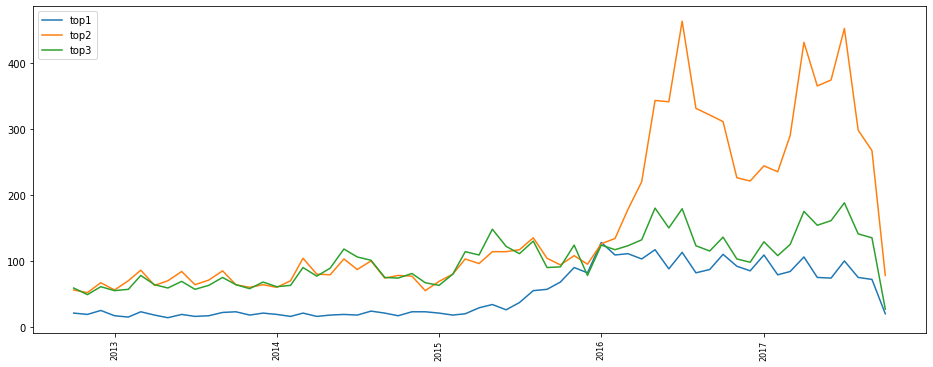

In [7]:
plt.figure(figsize=(16,6))
plt.xticks(rotation='vertical',size = 8)
top1, = plt.plot(df_monthly_sales['top 1'],label="top1")
top2, = plt.plot(df_monthly_sales['top 2'],label="top2")
top3, = plt.plot(df_monthly_sales['top 3'],label="top3")
leg = plt.legend(loc='upper left')
plt.show()

<h4> This graph represents all the ratings graph  

In [8]:
def draw_trend_line(trend,xf1,yf,name = ''):
    f, ax = plt.subplots(1, 1)
    ax.plot(xf1, yf,label='Linear fit {}'.format(name), lw=5)
    trend[-0:].plot(ax=ax,marker='.', ls='')
    plt.ylabel('trends growth')
    ax.legend()

In [9]:
def calculte_and_show_slope(trend,last_n_month=0,name=''): 
    y=np.array(trend[-last_n_month:].values, dtype=float)
    x=np.array(pd.to_datetime(trend[-last_n_month:].index).values, dtype=float)
    x1 = np.array(pd.to_datetime(trend[-last_n_month:].index).map(dt.datetime.toordinal), dtype=float) 
    
    slope1, _, _, _, _ =sp.linregress(x1,y)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y) 
    xf = np.linspace(min(x),max(x),100)
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    # print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
    draw_trend_line(trend,xf1,yf,name)
    return slope1

In [10]:
def calculate_and_show_trend(analysis):
    decompose_result_mult = seasonal_decompose(analysis, model="multiplicative",extrapolate_trend= 'freq')
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid
    return trend

top 1 groth rate 5.598002703633813


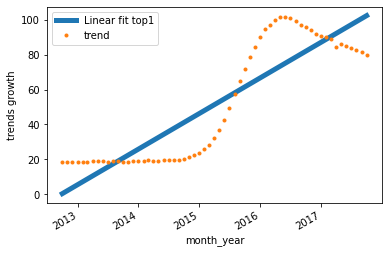

In [11]:
analysis1 = df_monthly_sales[['top 1']].copy()
trend1 = calculate_and_show_trend(analysis1)
top1_groth = calculte_and_show_slope(trend1,name ='top1')
print('top 1 groth rate {}'.format(top1_groth*100))

top 2 groth rate 18.541584614487473


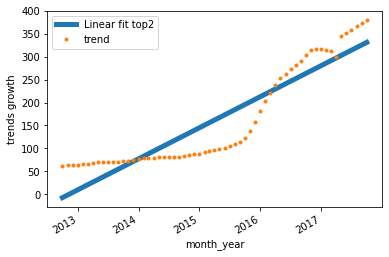

In [12]:
analysis2 = df_monthly_sales[['top 2']].copy()
trend2 = calculate_and_show_trend(analysis2)
top2_groth =calculte_and_show_slope(trend2,name ='top2')
print('top 2 groth rate {}'.format(top2_groth*100))

top 3 groth rate 5.44698582443648


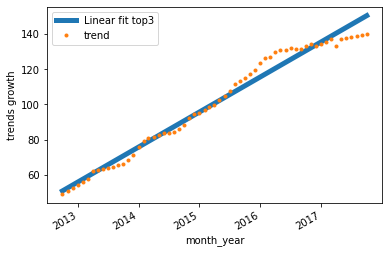

In [13]:
analysis3 = df_monthly_sales[['top 3']].copy()
trend3 = calculate_and_show_trend(analysis3)
top3_groth =calculte_and_show_slope(trend3,name ='top3')
print('top 3 groth rate {}'.format(top3_groth*100))

<h4> from this monthly data plot we can see top 2 is the best performing .<br>
    because we can observe an uptrend that is 18.54% clearly significatly higher than<br>
    top 1 (5.598%) and top3 (5.4469%)<br>
    so the bet performing serial is<br>
    - top2 with 18.54% trend<br>
    - top1 with 5.598% trend<br>
    - top3 with 5.4469% trend<br>
    

<h3> 2 a and b

In [14]:
class ScoreInterpret:
    
    def __init__(self,top):
        self.top = top.copy()
        # self.last_12m()
    
    def calculte_slope(self,last_n_month=0,name=''):
        y=np.array(self.trend[-last_n_month:].values, dtype=float)
        x=np.array(pd.to_datetime(self.trend[-last_n_month:].index).values, dtype=float)
        x1 = np.array(pd.to_datetime(self.trend[-last_n_month:].index).map(dt.datetime.toordinal), dtype=float) 

        self.slope, _, _, _, _ =sp.linregress(x1,y)
        
        # print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
        # draw_trend_line(trend,xf1,yf,name)
        slope1, intercept, r_value, p_value, std_err =sp.linregress(x,y) 
        xf = np.linspace(min(x),max(x),100)
        xf1 = xf.copy()
        xf1 = pd.to_datetime(xf1)
        yf = (slope1*xf)+intercept
        f, ax = plt.subplots(1, 1)
        ax.plot(xf1, yf,label='Linear fit {}'.format(name), lw=5)
        self.trend[-last_n_month:].plot(ax=ax,marker='.', ls='')
        plt.ylabel('trends growth')
        ax.legend()
    
    def calculate_trend(self):
        decompose_result_mult = seasonal_decompose(self.top, model="multiplicative",extrapolate_trend= 'freq')
        trend = decompose_result_mult.trend
        seasonal = decompose_result_mult.seasonal
        residual = decompose_result_mult.resid
        self.trend = trend
        
    def last_12m(self):
        self.calculate_trend()
        self.calculte_slope(last_n_month=12,name=self.top.columns[-1])
    
    def perf_12m(self):
        msg = "Top"+self.top.columns[-1].split()[-1]+"'s performance for the last 12 months is "+ format(self.slope*100,".2f")+"%"
        key = self.top.columns[-1].replace(" ", "")
        trend_dict = {key:msg} 
        print(trend_dict)
    
        

<h3> 3

In [15]:
si=ScoreInterpret(df_monthly_sales[['top 1']])
si1= ScoreInterpret(df_monthly_sales[['top 2']])
si2= ScoreInterpret(df_monthly_sales[['top 3']])

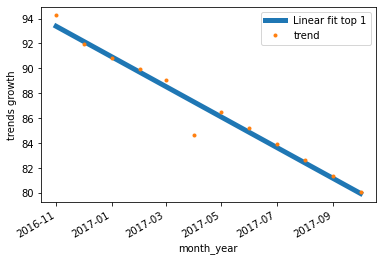

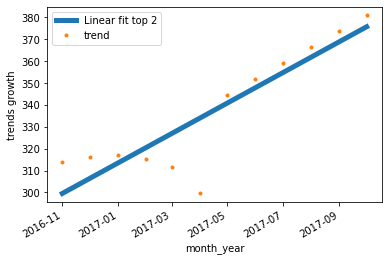

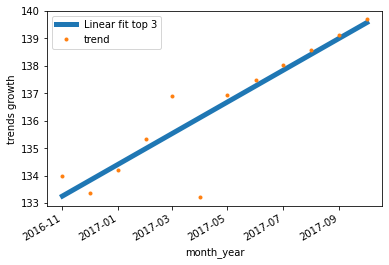

In [16]:
si.last_12m()
si1.last_12m()
si2.last_12m()

In [17]:
si.perf_12m()
si1.perf_12m()
si2.perf_12m()

{'top1': "Top1's performance for the last 12 months is -4.02%"}
{'top2': "Top2's performance for the last 12 months is 22.77%"}
{'top3': "Top3's performance for the last 12 months is 1.89%"}


<h2> Part 2

<h3> 1

In [23]:
pred_df = pd.read_csv('predictions.csv') 

In [24]:
pred_df = pred_df.loc[:, ~pred_df.columns.str.contains('^Unnamed')]

In [25]:
pred_df["date"] = pd.to_datetime(pred_df['date'])
pred_df = pred_df.sort_values(by='date',ascending=True)
pred_df.set_index('date',inplace=True)

In [26]:
col_names = pred_df.columns
col_top1 =  [i for i in col_names if 'top 1' in i]
col_top2 =  [i for i in col_names if 'top 2' in i]
col_top3 =  [i for i in col_names if 'top 3' in i]

In [27]:
pred_top1 = pred_df[col_top1]
pred_top2 = pred_df[col_top2]
pred_top3 = pred_df[col_top3]

In [28]:
act_top1 = trends_df[['date','top 1']]
act_top1.set_index('date',inplace=True)
act_top2 = trends_df[['date','top 2']]
act_top2.set_index('date',inplace=True)
act_top3 = trends_df[['date','top 3']]
act_top3.set_index('date',inplace=True)

<h4> calculating error (difference from the actual value)

In [29]:
err_top1 = pred_top1.sub(act_top1['top 1'],axis =0)
err_top2 = pred_top2.sub(act_top2['top 2'],axis =0)
err_top3 = pred_top3.sub(act_top3['top 3'],axis =0)

<h4> calculating error square 

In [140]:
def calculate_square(sub_df):
    cols = sub_df.columns
    for col in cols:
        sub_df[col]=sub_df[col]**2
    return sub_df

In [30]:
err_top1['fit top 1']=err_top1['fit top 1']**2
err_top1['fit2 top 1']=err_top1['fit2 top 1']**2
err_top1['fit3 top 1']=err_top1['fit3 top 1']**2

In [31]:
err_top2['fit top 2']=err_top2['fit top 2']**2
err_top2['fit2 top 2']=err_top2['fit2 top 2']**2
err_top2['fit3 top 2']=err_top2['fit3 top 2']**2

In [32]:
err_top3['fit top 3']=err_top3['fit top 3']**2
err_top3['fit2 top 3']=err_top3['fit2 top 3']**2
err_top3['fit3 top 3']=err_top3['fit3 top 3']**2

<h4> adding all the error square for evaluating fits

In [33]:
fit_top_1 = err_top1['fit top 1'].sum()
fit2_top_1 = err_top1['fit2 top 1'].sum()
fit3_top_1 = err_top1['fit3 top 1'].sum()

In [34]:
fit_top_2 = err_top2['fit top 2'].sum()
fit2_top_2 = err_top2['fit2 top 2'].sum()
fit3_top_2 = err_top2['fit3 top 2'].sum()

In [35]:
fit_top_3 = err_top3['fit top 3'].sum()
fit2_top_3 = err_top3['fit2 top 3'].sum()
fit3_top_3 = err_top3['fit3 top 3'].sum()

In [36]:
print(fit_top_2)
print(fit2_top_2)
print(fit3_top_2)

18130.440855013225
5060.195956056834
3401.2162844951827


In [37]:
print(fit_top_1)
print(fit2_top_1)
print(fit3_top_1)

1205.6752821348382
825.8202469439245
806.6263004631182


In [38]:
print(fit_top_3)
print(fit2_top_3)
print(fit3_top_3)

2316.737745229722
1584.328649186475
1463.9002240027853


<h4> From above cells we can clearly see that  <br>
    first Fit performed worst, than fit2 and than fit1. It is true for all the tops.<br>
    So,<br>1.Fit3 performed Best.<br>
        2. Fit2 performed second Best <br>
        3. Fit performed worst of all.

<h3> 2

In [109]:
def process_pred(no_of_month=3,df=None):
    df=df.reset_index()
    df['month_year'] = df['date'].apply(lambda x:x.strftime('%Y-%m'))
    mon_df=df.groupby('month_year').sum().reset_index()
    mon_df['month_year'] = pd.to_datetime(mon_df['month_year'])
    indecies= mon_df['month_year']
    indecies =indecies.loc[::no_of_month].reset_index() 
    mn_df= mon_df.groupby(mon_df.index//no_of_month).sum()
    mn_df['month_year']=indecies['month_year']
    mn_df= mn_df.set_index('month_year')
    return mn_df

In [165]:
def calculte_std_err(df):
    sub_df = df.diff()
    sub_df=sub_df.dropna()
    cols = sub_df.columns
    std_ar = []
    avg_err = 0
    for col in cols:
        sub_df[col]=sub_df[col]**2
        std = sub_df[col].sum()
        std = math.sqrt(std/len(sub_df))
        avg_err += std
        std_ar.append({col:std})
    std_ar.append({'avg_change':avg_err/len(cols)})
    return std_ar 

In [166]:
mon_df = process_pred(no_of_month=3,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 438.61332948523057},
 {'fit2 top 1': 449.6425328209579},
 {'fit3 top 1': 450.24258928820376},
 {'avg_change': 446.1661505314641}]

In [167]:
mon_df2 = process_pred(no_of_month=3,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 2340.897747519841},
 {'fit2 top 2': 1865.4714592046207},
 {'fit3 top 2': 1730.209005256326},
 {'avg_change': 1978.8594039935958}]

In [168]:
mon_df3 = process_pred(no_of_month=3,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 924.3508010933788},
 {'fit2 top 3': 918.5803268289284},
 {'fit3 top 3': 916.6143141868696},
 {'avg_change': 919.848480703059}]

<h4> After 3 month demand of <br>
    top 1 expected change 446.1661505314641<br>
    top 2 expected change 1978.8594039935958<br>
    top 3 expected change 919.848480703059 <br>

In [172]:
mon_df = process_pred(no_of_month=6,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 1240.4230445944968},
 {'fit2 top 1': 1263.5316955884905},
 {'fit3 top 1': 1265.877743351832},
 {'avg_change': 1256.6108278449399}]

In [170]:
mon_df2 = process_pred(no_of_month=6,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 6669.441285928682},
 {'fit2 top 2': 5345.633490941602},
 {'fit3 top 2': 5040.698334727575},
 {'avg_change': 5685.257703865954}]

In [171]:
mon_df3 = process_pred(no_of_month=6,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 2681.756397993612},
 {'fit2 top 3': 2672.0569167758786},
 {'fit3 top 3': 2665.4309908199457},
 {'avg_change': 2673.0814351964787}]

<h4> After 6 month demand of <br>
    top 1 expected change 1256.6108278449399<br>
    top 2 expected change 5685.257703865954<br>
    top 3 expected change 2673.0814351964787 <br>

In [173]:
mon_df = process_pred(no_of_month=12,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 3478.1673384876844},
 {'fit2 top 1': 3566.7694667885526},
 {'fit3 top 1': 3573.4660487709248},
 {'avg_change': 3539.4676180157203}]

In [174]:
mon_df2 = process_pred(no_of_month=12,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 18498.96568349536},
 {'fit2 top 2': 14612.13776902348},
 {'fit3 top 2': 13523.064685587375},
 {'avg_change': 15544.722712702074}]

In [175]:
mon_df3 = process_pred(no_of_month=12,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 7473.074902203242},
 {'fit2 top 3': 7394.035319391239},
 {'fit3 top 3': 7355.887490812264},
 {'avg_change': 7407.6659041355815}]

<h4> After 12 month demand of <br>
    top 1 expected change 3539.4676180157203<br>
    top 2 expected change 15544.722712702074<br>
    top 3 expected change 7407.6659041355815 <br>

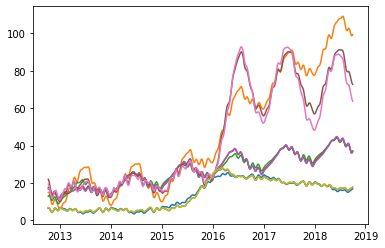

In [91]:
plt.plot(pred_df)

In [68]:
err_top1 = err_top1.assign(err_fit= lambda x:(x['fit top 1']**2))
err_top1 = err_top1.assign(err_fit2= lambda x:(x['fit2 top 1']**2))
err_top1 = err_top1.assign(err_fit3= lambda x:(x['fit3 top 1']**2))

In [69]:
err_top2 = err_top2.assign(err_fit= lambda x:(x['fit top 2']**2))
err_top2 = err_top2.assign(err_fit2= lambda x:(x['fit2 top 2']**2))
err_top2 = err_top2.assign(err_fit3= lambda x:(x['fit3 top 2']**2))

In [70]:
err_top3 = err_top3.assign(err_fit= lambda x:(x['fit top 3']**2))
err_top3 = err_top3.assign(err_fit2= lambda x:(x['fit2 top 3']**2))
err_top3 = err_top3.assign(err_fit3= lambda x:(x['fit3 top 3']**2))

In [ ]:
df_monthly_sales.head()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis3 = df_monthly_sales[['top 1']].copy()

decompose_result_mult = seasonal_decompose(analysis3, model="multiplicative",extrapolate_trend= 'freq')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis4 = df_monthly_sales[['top 1']].copy()

decompose_result_mult4 = seasonal_decompose(analysis4, model="additive",extrapolate_trend= 'freq' )

trend4 = decompose_result_mult4.trend
seasonal4 = decompose_result_mult4.seasonal
residual4 = decompose_result_mult4.resid
decompose_result_mult4.plot()

In [ ]:
trend.tail(50)

In [ ]:
import scipy.stats as sp
y=np.array(trend[-0:].values, dtype=float)
x=np.array(pd.to_datetime(trend[-0:].index).values, dtype=float)

In [ ]:
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

In [ ]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=5)
trend[-0:].plot(ax=ax,marker='.', ls='')
plt.ylabel('Arsenic concentration')
ax.legend();

In [ ]:
import datetime as dt
x1=np.array(pd.to_datetime(trend[-0:].index).map(dt.datetime.toordinal), dtype=float)
slope1, intercept, r_value, p_value, std_err =sp.linregress(x1,y)
print(slope1)

In [ ]:
trend.tail(50)

In [ ]:
analysis1 = df_monthly_sales[['top 2']].copy()
decompose_result_mult1 = seasonal_decompose(analysis1, model="multiplicative")
trend1 = decompose_result_mult1.trend
seasonal1 = decompose_result_mult1.seasonal
residual1 = decompose_result_mult1.resid
decompose_result_mult1.plot()

In [ ]:
analysis2 = df_monthly_sales[['top 3']].copy()
decompose_result_mult2 = seasonal_decompose(analysis2, model="multiplicative")
trend2 = decompose_result_mult2.trend
seasonal2 = decompose_result_mult2.seasonal
residual2 = decompose_result_mult2.resid
decompose_result_mult2.plot()

In [ ]:
# def plot_df(df, x, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=100)
#     plt.plot(x, y1, color='tab:red')
#     plt.plot(x, y2, color='tab:blue')
#     plt.plot(x, y3, color='tab:green')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

In [ ]:
def plot_df(df, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=100)
    plt.plot( y1, color='tab:red')
    plt.plot( y2, color='tab:blue')
    plt.plot( y3, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [ ]:
plot_df(trends_df, y1=trends_df['top 1'],y2=trends_df['top 2'],y3=trends_df['top 3'], title='trands of all.')

In [ ]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window,center=True).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

In [ ]:
test_ts1 = trends_df['top 1']
test_ts1.head()

In [ ]:
test_ts2 = trends_df['top 2']
test_ts2.head()

In [ ]:
test_ts3 = trends_df['top 3']
test_ts3.head()

In [ ]:
plot_ts(test_ts1, window=5)

In [ ]:
plot_ts(test_ts2, window=5)

In [ ]:
plot_ts(test_ts3, window=5)

In [ ]:
# analysis=trends_df['top 3']
analysis = trends_df[['top 1']].copy()
# test_ts3.head()
analysis.head()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis = trends_df[['top 1']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
analysis = trends_df[['top 2']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();